In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

### Maths Servers:

In [2]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 

# import dataset for maths servers
ds = xr.open_mfdataset('/home/links/ct715/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
                            parallel=True, chunks={'time': 31})

ds

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ubar     (level, lat) float32 dask.array<chunksize=(37, 73), meta=np.ndarray>

### JASMIN Servers:

In [3]:
# import sys
# sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
# import functions.eddy_feedback as ef 

# # import dataset for JASMIN servers
# ds = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
#                             parallel=True, chunks={'time': 31})

# ds

# Investigate EFP at more levels

In [4]:
# cut dataset down to EFP box
ds = ds.where(ds.level >= 200., drop=True)
ds = ds.where(ds.level <= 600., drop=True)
ds = ds.where(ds.lat >= 25., drop=True)
ds = ds.where(ds.lat <= 75., drop=True)

In [5]:
# define ubar DataArray
u = ds.u.mean('lon')
u = u.groupby('time.year').mean('time').load()
u = u.transpose()

# define ubar DataArray
div1 = ds.div1.groupby('time.year').mean('time').load()
div1 = div1.transpose()

### Take the mean over level domain

In [6]:
# ubar
ubar = ds.u.mean('lon')
ubar = ubar.groupby('time.year').mean('time').load()
ubar = ubar.mean('level')
ubar = ubar.transpose()

# div1
div1bar = ds.div1.groupby('time.year').mean('time').load()
div1bar = div1bar.mean('level')
div1bar = div1bar.transpose()

# Facet grids

### ubar

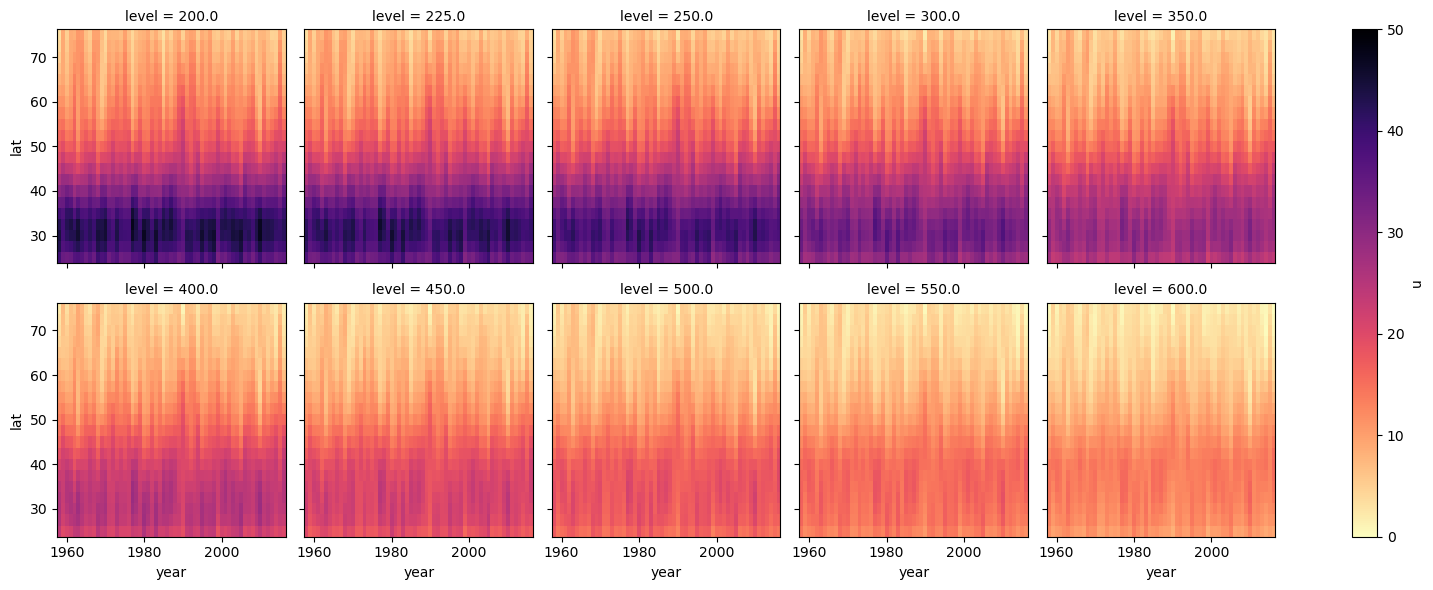

In [25]:
u.plot(x='year', y='lat', col='level', col_wrap=5, vmin=0, vmax=50, cmap='magma_r')

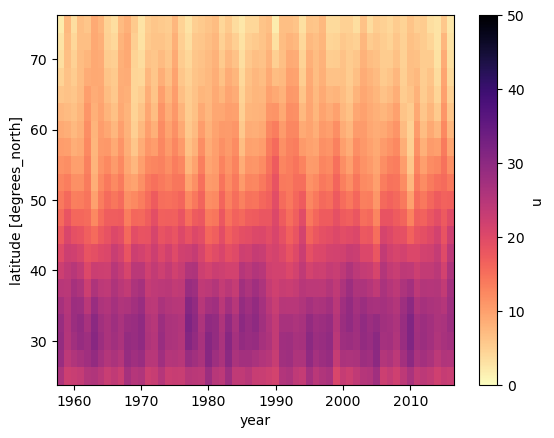

In [26]:
ubar.plot(cmap='magma_r', vmin=0, vmax=50)

### div1

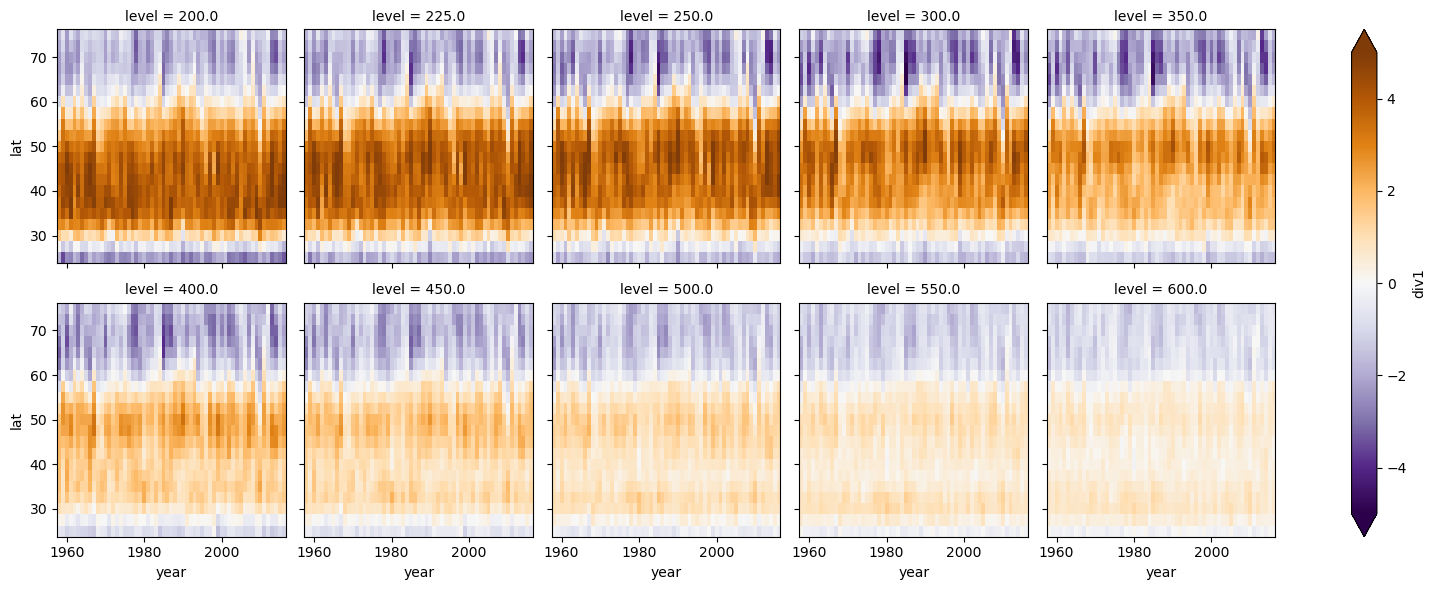

In [27]:
div1.plot(x='year', y='lat', col='level', col_wrap=5, vmin=-5, vmax=5, cmap='PuOr_r')

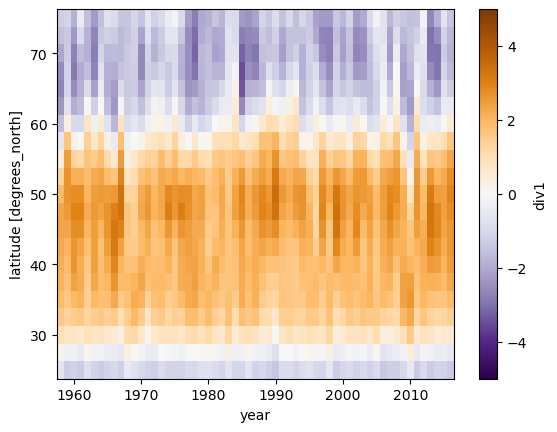

In [28]:
div1bar.plot(vmin=-5, vmax=5, cmap='PuOr_r')

# Put all plots together

In [12]:
#### CANT ADD SUBPLOT TO FACET GRID ####

# fig, (ax1,ax2) = plt.subplots(ncols=2)

# # facet grid
# u.plot(ax=ax1, x='year', y='lat', col='level', col_wrap=5)

# # level mean
# ubar.plot(ax=ax2)

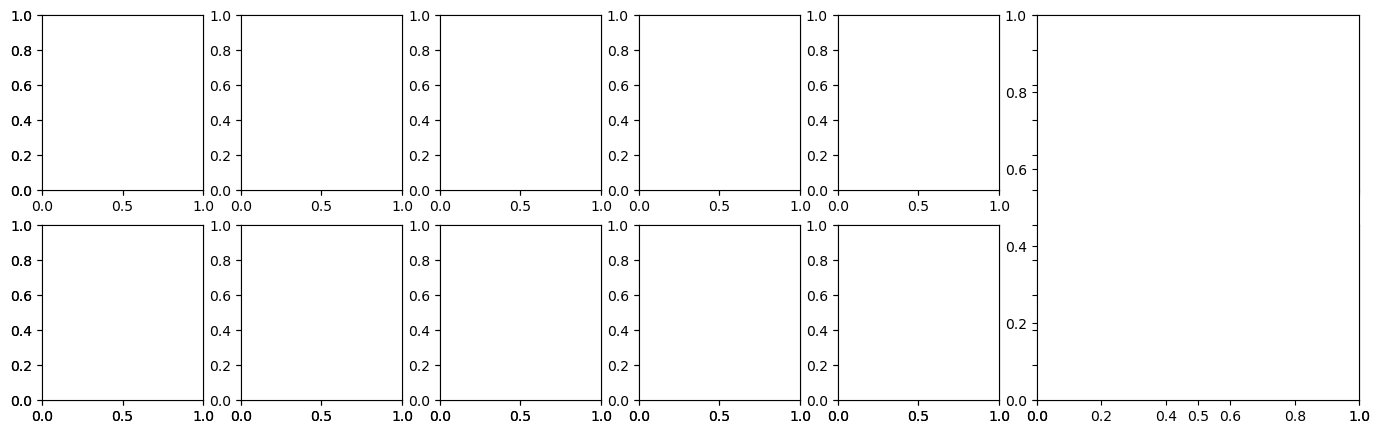

In [65]:
fig = plt.subplots(2,6, figsize=(17,5), sharex=True, sharey=True,
                   gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 2]})

ax1 = plt.subplot2grid( (2,6), (0,0))
ax2 = plt.subplot2grid( (2,6), (0,1))
ax3 = plt.subplot2grid( (2,6), (0,2))
ax4 = plt.subplot2grid( (2,6), (0,3))
ax5 = plt.subplot2grid( (2,6), (0,4))

ax6 = plt.subplot2grid( (2,6), (1,0))
ax7 = plt.subplot2grid( (2,6), (1,1))
ax8 = plt.subplot2grid( (2,6), (1,2))
ax9 = plt.subplot2grid( (2,6), (1,3))
ax10 = plt.subplot2grid( (2,6), (1,4))

ax11 = plt.subplot2grid( (2,6), (0,5), rowspan=2)

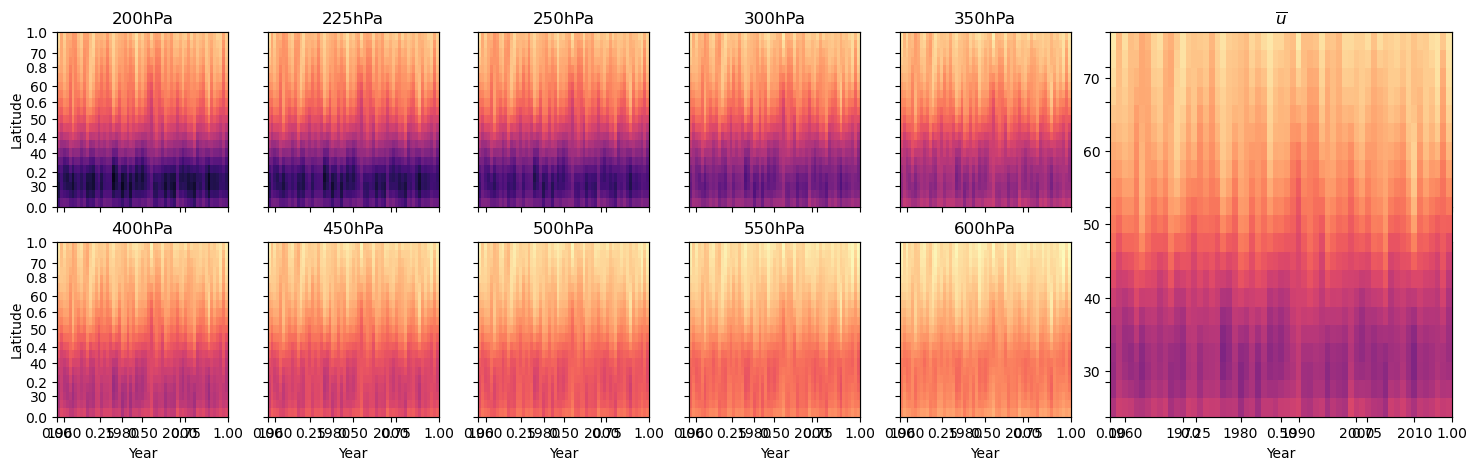

In [78]:
fig = plt.subplots(2,6, figsize=(18,5), sharex=True, sharey=True,
                   gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 2]})

# top row
ax1 = plt.subplot2grid( (2,6), (0,0))
ax1.pcolormesh(u.year.values, u.lat.values, u[:,0,:], cmap='magma_r', vmin=0, vmax=50)
ax1.set_ylabel('Latitude')
ax1.set_title('200hPa')
ax1.set_xticklabels([])

ax2 = plt.subplot2grid( (2,6), (0,1))
ax2.pcolormesh(u.year.values, u.lat.values, u[:,1,:], cmap='magma_r', vmin=0, vmax=50)
ax2.set_title('225hPa')
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3 = plt.subplot2grid( (2,6), (0,2))
ax3.pcolormesh(u.year.values, u.lat.values, u[:,2,:], cmap='magma_r', vmin=0, vmax=50)
ax3.set_title('250hPa')
ax3.set_xticklabels([])
ax3.set_yticklabels([])

ax4 = plt.subplot2grid( (2,6), (0,3))
ax4.pcolormesh(u.year.values, u.lat.values, u[:,3,:], cmap='magma_r', vmin=0, vmax=50)
ax4.set_title('300hPa')
ax4.set_xticklabels([])
ax4.set_yticklabels([])

ax5 = plt.subplot2grid( (2,6), (0,4))
ax5.pcolormesh(u.year.values, u.lat.values, u[:,4,:], cmap='magma_r', vmin=0, vmax=50)
ax5.set_title('350hPa')
ax5.set_xticklabels([])
ax5.set_yticklabels([])


# bottom row
ax6 = plt.subplot2grid( (2,6), (1,0))
ax6.pcolormesh(u.year.values, u.lat.values, u[:,5,:], cmap='magma_r', vmin=0, vmax=50)
ax6.set_ylabel('Latitude')
ax6.set_title('400hPa')
ax6.set_xlabel('Year')

ax7 = plt.subplot2grid( (2,6), (1,1))
ax7.pcolormesh(u.year.values, u.lat.values, u[:,6,:], cmap='magma_r', vmin=0, vmax=50)
ax7.set_title('450hPa')
ax7.set_yticklabels([])
ax7.set_xlabel('Year')

ax8 = plt.subplot2grid( (2,6), (1,2))
ax8.pcolormesh(u.year.values, u.lat.values, u[:,7,:], cmap='magma_r', vmin=0, vmax=50)
ax8.set_title('500hPa')
ax8.set_yticklabels([])
ax8.set_xlabel('Year')

ax9 = plt.subplot2grid( (2,6), (1,3))
ax9.pcolormesh(u.year.values, u.lat.values, u[:,8,:], cmap='magma_r', vmin=0, vmax=50)
ax9.set_title('550hPa')
ax9.set_yticklabels([])
ax9.set_xlabel('Year')

ax10 = plt.subplot2grid( (2,6), (1,4))
ax10.pcolormesh(u.year.values, u.lat.values, u[:,9,:], cmap='magma_r', vmin=0, vmax=50)
ax10.set_title('600hPa')
ax10.set_yticklabels([])
ax10.set_xlabel('Year')

# mean over domain
ax11 = plt.subplot2grid( (2,6), (0,5), rowspan=2)
ax11.pcolormesh(ubar.year.values, ubar.lat.values, ubar, cmap='magma_r', vmin=0, vmax=50)
ax11.set_title('$\\overline{u}$')
ax11.set_xlabel('Year') 

plt.show()

### ubar

In [57]:
u[:,0,:].level

<xarray.DataArray 'level' ()>
array(200.)
Coordinates:
    level    float64 200.0

### div1